## Sliding window search

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [25]:
from pprint import pprint
import pickle
from glob import glob
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import utils

In [26]:
with open("./output_data/training_info.p", 'rb') as f:
    train_info = pickle.load(f)

255 0
26552
{'cell_per_block': 2,
 'cspace': 'YCrCb',
 'hist_bins': 32,
 'hist_feat': True,
 'hog_channel': 'ALL',
 'hog_feat': True,
 'model': LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
 'n_feature': 26552,
 'orient': 13,
 'pix_per_cell': 8,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'spatial_feat': True,
 'spatial_size': (12, 12)}


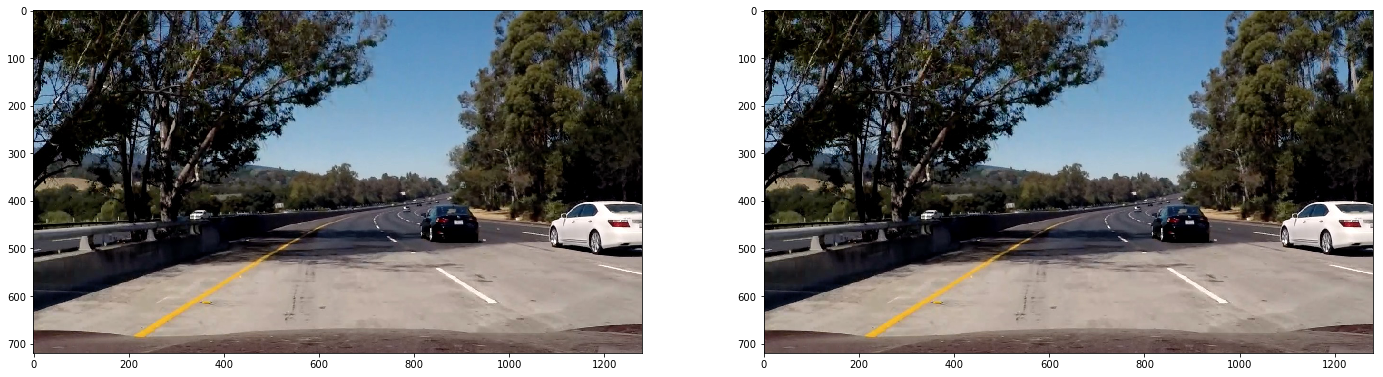

In [27]:
image_pathes = glob("test_images/*jpg")
test_images = [utils.load_img(image_path) for image_path in image_pathes]

img = test_images[4]

print(img.max(), img.min())

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
img = utils.image_preprocess(img)
plt.imshow(img)

print(train_info["n_feature"])
pprint(train_info)

/Users/akiyuki/.pyenv/versions/miniconda3-4.3.11/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


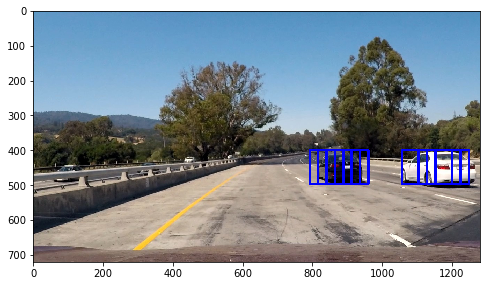

In [28]:
svc = train_info["model"]
X_scaler = train_info["scaler"]
cspace = train_info["cspace"]
orient = train_info["orient"]
pix_per_cell = train_info["pix_per_cell"]
cell_per_block = train_info["cell_per_block"]
hog_channel = train_info["hog_channel"]
spatial_size = train_info["spatial_size"]
hist_bins = train_info["hist_bins"]

ystart, ystop, scale = (400, 600, 1.5)

img = test_images[0]
img = utils.image_preprocess(img)
#img = np.uint8(img*255)
bboxes = utils.find_cars(img, ystart, ystop, scale, svc, X_scaler, cspace, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins)
img = utils.draw_boxes(img, bboxes)

plt.figure(figsize=(8, 24))
plt.imshow(img)


/Users/akiyuki/.pyenv/versions/miniconda3-4.3.11/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


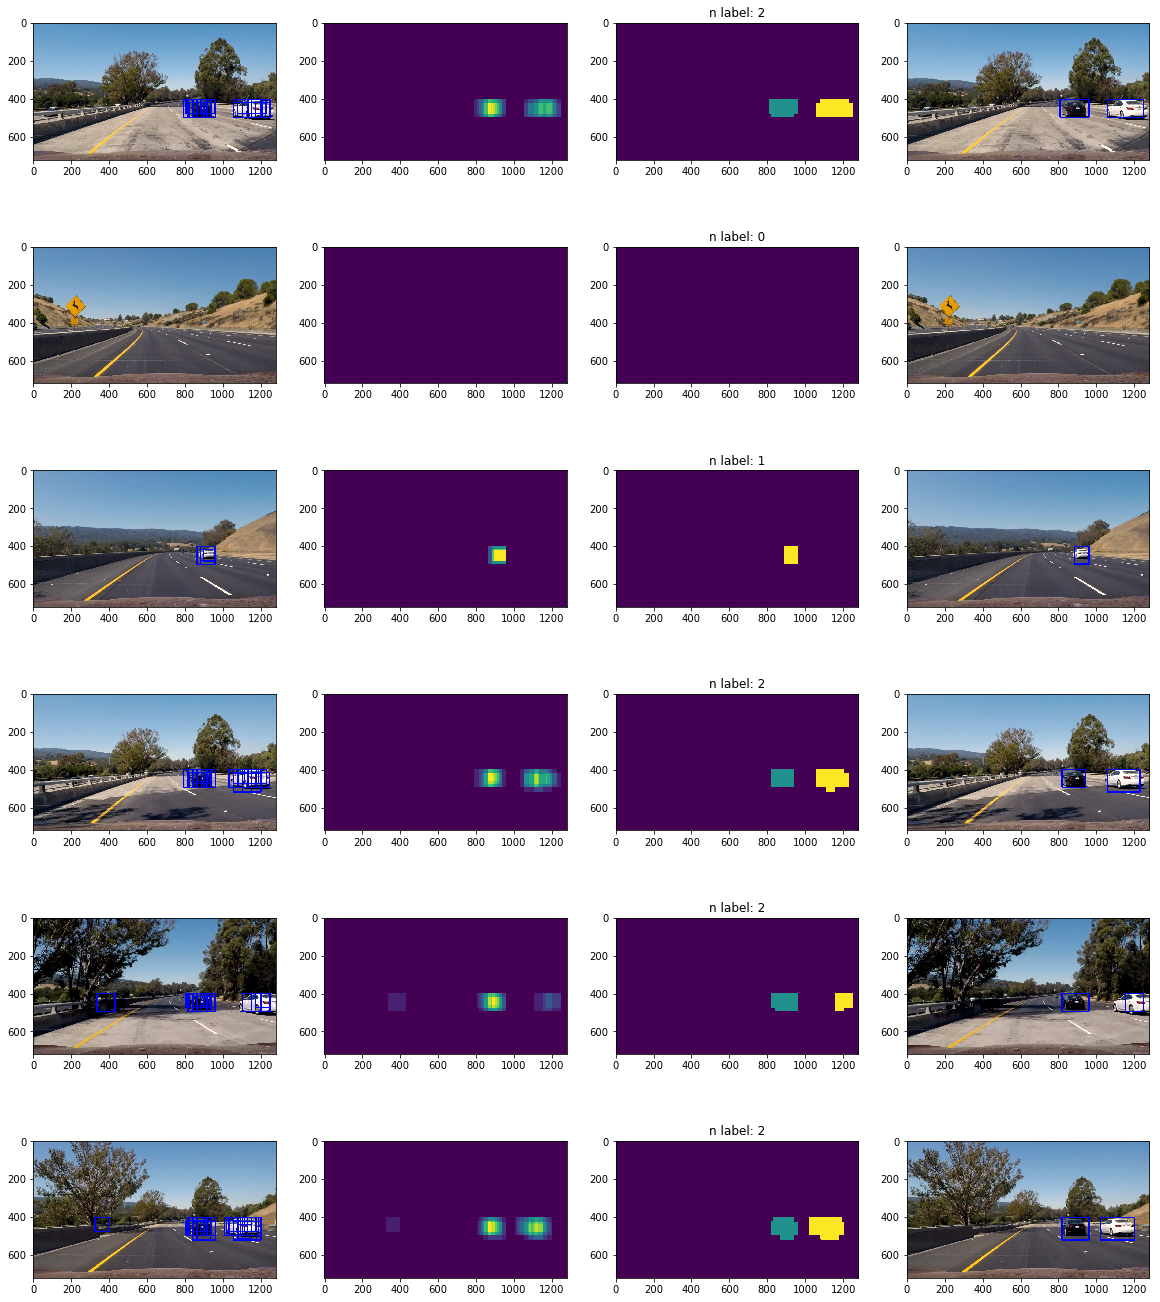

In [33]:
from scipy.ndimage.measurements import label

multi_scales = [
    (370, 480, 1.0),
    (400, 550, 1.2),
    (400, 600, 1.5),
    (450, 650, 1.7),
    (450, 700, 2.0),
]
threshold = 1
n = len(test_images)
plt.figure(figsize=(20, 24))
ny = 4
for i, img in enumerate(test_images):
    multiscale_bboxes = []
    img = utils.image_preprocess(img)

    for search_info in multi_scales:
        ## get bbox
        ystart, ystop, scale = search_info
        bboxes = utils.find_cars(img, ystart, ystop, scale, svc, X_scaler, cspace, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins)
        multiscale_bboxes = multiscale_bboxes + bboxes
    
    ## draw bboxes
    img_bbox = utils.draw_boxes(img, multiscale_bboxes)
    plt.subplot(n, ny, ny*i+1)
    plt.imshow(img_bbox)
    
    ## make heatmatp
    img_heat = np.zeros_like(img[:,:,0]).astype(np.float)
    img_heat = utils.add_heat(img_heat, multiscale_bboxes)
    plt.subplot(n, ny, ny*i+2)
    plt.imshow(img_heat)
        
    ## apply thresh
    img_thresh = utils.apply_threshold(np.copy(img_heat), threshold)
    labels = label(img_thresh)
    img_label, nlabel = labels
    ax = plt.subplot(n, ny, ny*i+3)
    ax.set_title("n label: {0}".format(nlabel))
    plt.imshow(img_label)
    
    ## draw labeled bbox
    img_label_bbox = utils.draw_labeled_bboxes(img, labels)
    plt.subplot(n, ny, ny*i+4)
    plt.imshow(img_label_bbox)
        